In [55]:
#pip install openpyxl

In [8]:
import pandas as pd
import glob
import os

# Data Collection

In [9]:
folder_path = r"C:\Users\Lenovo E15\Documents\Data Science\Jakarta-Weather-Prediction-2025\Dataset Raw"

all_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

df_list = []

for file in all_files:
    try:
        df = pd.read_excel(file)
        #Delete Header
        df = df.iloc[7:, :].reset_index(drop=True)
        #Reset index
        df.dropna(how='all', inplace=True)
        df.reset_index(drop=True, inplace=True)
        #Delete footer
        if len(df) > 13:
            df = df.iloc[:-13, :]

        #Reset index + delete 
        df.dropna(how='all', inplace=True)
        df.reset_index(drop=True, inplace=True)

        df_list.append(df)
        print(f"Berhasil proses: {os.path.basename(file)} | Baris tersisa: {len(df)}")

    except Exception as e:
        print(f"Gagal membaca {file}: {e}")

#Combine all excel
merged_df = pd.concat(df_list, ignore_index=True)

#Output
merged_df.to_excel("Datamergedoang.xlsx", index=False)


Berhasil proses: 1-laporan_iklim_harian.xlsx | Baris tersisa: 31
Berhasil proses: 10-laporan_iklim_harian.xlsx | Baris tersisa: 31
Berhasil proses: 11-laporan_iklim_harian.xlsx | Baris tersisa: 30
Berhasil proses: 12-laporan_iklim_harian.xlsx | Baris tersisa: 31
Berhasil proses: 13-laporan_iklim_harian.xlsx | Baris tersisa: 31
Berhasil proses: 14-laporan_iklim_harian.xlsx | Baris tersisa: 29
Berhasil proses: 15-laporan_iklim_harian.xlsx | Baris tersisa: 31
Berhasil proses: 16-laporan_iklim_harian.xlsx | Baris tersisa: 30
Berhasil proses: 17-laporan_iklim_harian.xlsx | Baris tersisa: 31
Berhasil proses: 18-laporan_iklim_harian.xlsx | Baris tersisa: 30
Berhasil proses: 19-laporan_iklim_harian.xlsx | Baris tersisa: 31
Berhasil proses: 1Feb15-laporan_iklim_harian.xlsx | Baris tersisa: 28
Berhasil proses: 1Jan15-laporan_iklim_harian.xlsx | Baris tersisa: 31
Berhasil proses: 1Mar15-laporan_iklim_harian.xlsx | Baris tersisa: 31
Berhasil proses: 2-laporan_iklim_harian.xlsx | Baris tersisa: 28


# Data Cleaning

In [10]:
new_df = pd.read_excel('Datamergedoang.xlsx')

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4020 non-null   object
 1   ID WMO       4020 non-null   object
 2   :  96745     4020 non-null   object
 3   Unnamed: 3   4020 non-null   object
 4   Unnamed: 4   4020 non-null   object
 5   Unnamed: 5   4020 non-null   object
 6   Unnamed: 6   4020 non-null   object
 7   Unnamed: 7   4020 non-null   int64 
 8   Unnamed: 8   4020 non-null   int64 
 9   Unnamed: 9   4020 non-null   int64 
 10  Unnamed: 10  4020 non-null   object
dtypes: int64(3), object(8)
memory usage: 345.6+ KB


In [12]:
#Add column name
new_df.columns=["Tanggal", "Temperatur Minimum", "Temperatur Maksimum", "Temperatur Rata-rata", "Kelembapan Rata-rata", "Curah Hujan (mm)", 
    "Lamanya Penyinaran Matahari", "Kecepatan Angin Maksimum", "Arah Angin Saat Kecepatan Maksimum", "Kecepatan Angin Rata-rata", "Arah Angin Terbanyak (°)"]

In [16]:
new_df["Tanggal"] = pd.to_datetime(new_df["Tanggal"], format="%d-%m-%Y", errors="coerce")

In [17]:
new_df["Tanggal"].dt.year.value_counts()


Tanggal
2021    378
2020    371
2024    366
2016    366
2023    365
2022    365
2017    365
2018    365
2015    364
2019    364
2025    351
Name: count, dtype: int64

In [18]:
new_df.isna().sum()

Tanggal                               0
Temperatur Minimum                    0
Temperatur Maksimum                   0
Temperatur Rata-rata                  0
Kelembapan Rata-rata                  0
Curah Hujan (mm)                      0
Lamanya Penyinaran Matahari           0
Kecepatan Angin Maksimum              0
Arah Angin Saat Kecepatan Maksimum    0
Kecepatan Angin Rata-rata             0
Arah Angin Terbanyak (°)              0
dtype: int64

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             4020 non-null   datetime64[ns]
 1   Temperatur Minimum                  4020 non-null   object        
 2   Temperatur Maksimum                 4020 non-null   object        
 3   Temperatur Rata-rata                4020 non-null   object        
 4   Kelembapan Rata-rata                4020 non-null   object        
 5   Curah Hujan (mm)                    4020 non-null   object        
 6   Lamanya Penyinaran Matahari         4020 non-null   object        
 7   Kecepatan Angin Maksimum            4020 non-null   int64         
 8   Arah Angin Saat Kecepatan Maksimum  4020 non-null   int64         
 9   Kecepatan Angin Rata-rata           4020 non-null   int64         
 10  Arah Angin Terbanyak (°)

In [20]:
new_df.head(5)

,Tanggal,Temperatur Minimum,Temperatur Maksimum,Temperatur Rata-rata,Kelembapan Rata-rata,Curah Hujan (mm),Lamanya Penyinaran Matahari,Kecepatan Angin Maksimum,Arah Angin Saat Kecepatan Maksimum,Kecepatan Angin Rata-rata,Arah Angin Terbanyak (°)
0,2023-01-01,23.6,29.8,26.3,87,14.5,0,4,320,1,C
1,2023-01-02,24.2,29.4,27.5,81,31.5,0.7,4,320,2,NW
2,2023-01-03,25,29.6,26.6,82,0.5,0,6,316,1,C
3,2023-01-04,24.4,30,26.4,86,2.4,-,5,316,1,C
4,2023-01-05,24,32.6,27.4,83,35.3,-,4,317,2,C


In [21]:
#Save Original Dataset 
new_df.to_excel('Updated_Data_Historis_2015_2025.xlsx', index=False)
data = pd.read_excel('Updated_Data_Historis_2015_2025.xlsx')

In [24]:
numeric_cols = ['Temperatur Minimum', 'Temperatur Maksimum', 'Temperatur Rata-rata', 'Kelembapan Rata-rata', 'Curah Hujan (mm)', 'Lamanya Penyinaran Matahari']

data[numeric_cols] = (
    data[numeric_cols]
    .astype(str) 
    .replace(['-', '–', '—', ' - ', 'nan', 'NaN'], '8888', regex=False)
)

# Ubah semuanya ke numeric (float)
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col],errors='coerce')

In [25]:
data.isna().sum()

Tanggal                               0
Temperatur Minimum                    0
Temperatur Maksimum                   0
Temperatur Rata-rata                  0
Kelembapan Rata-rata                  0
Curah Hujan (mm)                      0
Lamanya Penyinaran Matahari           0
Kecepatan Angin Maksimum              0
Arah Angin Saat Kecepatan Maksimum    0
Kecepatan Angin Rata-rata             0
Arah Angin Terbanyak (°)              0
dtype: int64

In [26]:
data['Arah Angin Terbanyak (°)'].unique()


array(['C ', 'NW', 'W ', 'SW', 'E ', 'C', 'E', 'N ', 'W', 'SE', 'S '],
      dtype=object)

In [27]:
data['Arah Angin Terbanyak (°)'] = data['Arah Angin Terbanyak (°)'].str.strip().str.upper()

In [28]:
# Data mapping for DDR_CAR

mapping = {
    'C': 0, #Calm
    'N': 0, #North
    'NE': 45, #North East
    'E': 90, #East
    'SE': 135, #South East 
    'S': 180, #South
    'SW': 225, #South West 
    'W': 270, #West 
    'NW': 315 #North West
}

data['Arah Angin Terbanyak (°)'] = data['Arah Angin Terbanyak (°)'].map(mapping)

In [29]:
data.isna().sum()

Tanggal                               0
Temperatur Minimum                    0
Temperatur Maksimum                   0
Temperatur Rata-rata                  0
Kelembapan Rata-rata                  0
Curah Hujan (mm)                      0
Lamanya Penyinaran Matahari           0
Kecepatan Angin Maksimum              0
Arah Angin Saat Kecepatan Maksimum    0
Kecepatan Angin Rata-rata             0
Arah Angin Terbanyak (°)              0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             4020 non-null   datetime64[ns]
 1   Temperatur Minimum                  4020 non-null   float64       
 2   Temperatur Maksimum                 4020 non-null   float64       
 3   Temperatur Rata-rata                4020 non-null   float64       
 4   Kelembapan Rata-rata                4020 non-null   int64         
 5   Curah Hujan (mm)                    4020 non-null   float64       
 6   Lamanya Penyinaran Matahari         4020 non-null   float64       
 7   Kecepatan Angin Maksimum            4020 non-null   int64         
 8   Arah Angin Saat Kecepatan Maksimum  4020 non-null   int64         
 9   Kecepatan Angin Rata-rata           4020 non-null   int64         
 10  Arah Angin Terbanyak (°)

In [31]:
#Check how many rows in column Curah Hujan (mm) has 8888 value


check8888 = (data == 8888).sum().sum()
print("8888 count in any column ", check8888)

check9999 = (data == 9999).sum().sum()
print("9999 count in any column ", check9999)



8888 count in any column  980
9999 count in any column  0


In [33]:
# Fill 8888 values in any colomn

import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#We replace 8888 to nan 
data.replace(8888, np.nan, inplace=True)

#We select all of the column that has nan value
num_cols = ['Temperatur Minimum', 'Temperatur Maksimum', 'Temperatur Rata-rata', 'Kelembapan Rata-rata', 'Curah Hujan (mm)', 'Lamanya Penyinaran Matahari', 'Kecepatan Angin Maksimum', 'Arah Angin Saat Kecepatan Maksimum', 'Kecepatan Angin Rata-rata', 'Arah Angin Terbanyak (°)'] 

#InterativeImputer 

imputer = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ),
    random_state=42,
    max_iter=10
)

# Begin the imputer
data[num_cols] = imputer.fit_transform(data[num_cols])

#Save to another excel 


# ✅ Save to Excel (dataset final)
output_path = "updated_dataset_final.xlsx"
data.to_excel(output_path, index=False)

print(f"✅ File berhasil disimpan sebagai '{output_path}'")


c:\Users\Lenovo E15\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


✅ File berhasil disimpan sebagai 'updated_dataset_final.xlsx'


In [34]:
print(num_cols)
print(data.columns)

['Temperatur Minimum', 'Temperatur Maksimum', 'Temperatur Rata-rata', 'Kelembapan Rata-rata', 'Curah Hujan (mm)', 'Lamanya Penyinaran Matahari', 'Kecepatan Angin Maksimum', 'Arah Angin Saat Kecepatan Maksimum', 'Kecepatan Angin Rata-rata', 'Arah Angin Terbanyak (°)']
Index(['Tanggal', 'Temperatur Minimum', 'Temperatur Maksimum',
       'Temperatur Rata-rata', 'Kelembapan Rata-rata', 'Curah Hujan (mm)',
       'Lamanya Penyinaran Matahari', 'Kecepatan Angin Maksimum',
       'Arah Angin Saat Kecepatan Maksimum', 'Kecepatan Angin Rata-rata',
       'Arah Angin Terbanyak (°)'],
      dtype='object')


In [35]:
final_data = pd.read_excel('updated_dataset_final.xlsx')

print(final_data[num_cols].isna().sum())

Temperatur Minimum                    0
Temperatur Maksimum                   0
Temperatur Rata-rata                  0
Kelembapan Rata-rata                  0
Curah Hujan (mm)                      0
Lamanya Penyinaran Matahari           0
Kecepatan Angin Maksimum              0
Arah Angin Saat Kecepatan Maksimum    0
Kecepatan Angin Rata-rata             0
Arah Angin Terbanyak (°)              0
dtype: int64


In [36]:
check888after = (new_df == 8888).sum().sum()
print(check888after)

209


# EDA 

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             4020 non-null   datetime64[ns]
 1   Temperatur Minimum                  4020 non-null   object        
 2   Temperatur Maksimum                 4020 non-null   object        
 3   Temperatur Rata-rata                4020 non-null   object        
 4   Kelembapan Rata-rata                4020 non-null   object        
 5   Curah Hujan (mm)                    4020 non-null   object        
 6   Lamanya Penyinaran Matahari         4020 non-null   object        
 7   Kecepatan Angin Maksimum            4020 non-null   int64         
 8   Arah Angin Saat Kecepatan Maksimum  4020 non-null   int64         
 9   Kecepatan Angin Rata-rata           4020 non-null   int64         
 10  Arah Angin Terbanyak (°)

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
coCurah Hujan (mm)elation =numeric_df.coCurah Hujan (mm)with(df['Curah Hujan (mm)']).abs()
print(coCurah Hujan (mm)elation)

TN         0.461893
TX         0.353074
TAVG       0.413975
RH_AVG     0.415572
RR         1.000000
SS         0.212502
FF_X       0.063282
DDD_X      0.018903
FF_AVG     0.101697
DDD_CAR    0.036750
dtype: float64


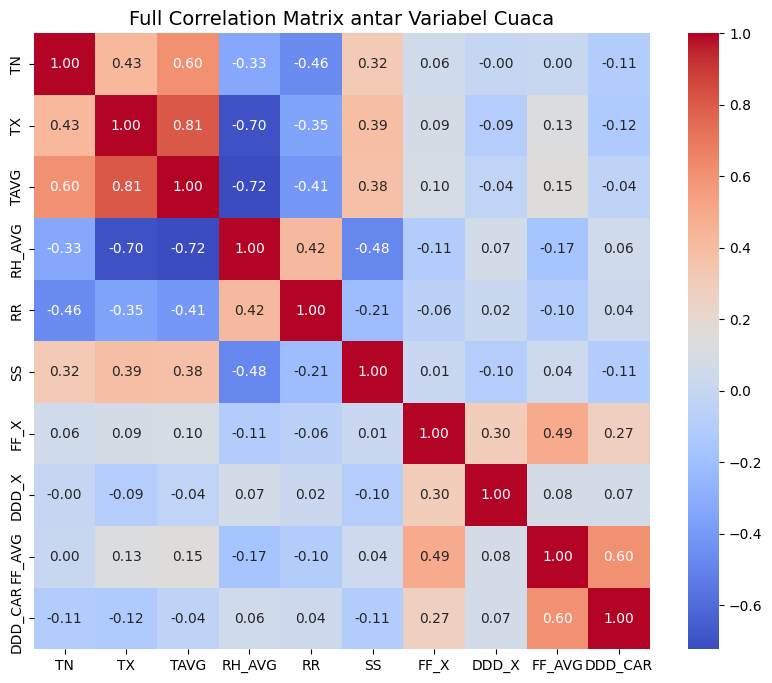

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom Tanggal tidak ikut
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Buat matrix korelasi penuh
coCurah Hujan (mm)_matrix = numeric_df.coCurah Hujan (mm)()

# Visualisasikan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(coCurah Hujan (mm)_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Full CoCurah Hujan (mm)elation Matrix antar Variabel Cuaca', fontsize=14)
plt.show()

# Data Modelling